In [14]:
import numpy as np
import matplotlib.pyplot as plt
from bcnf.simulation.physics import physics_ODE_simulation

# Single Simulation

In [26]:
# Define the parameters
x0 = np.array([0, 0, 1.8])     # initial position
v0 = np.array([10, 10, 10])   # initial velocity
g = np.array([0, 0, -9.81])     # gravitational acceleration
w = np.array([-10, 10, 0])      # wind
b = 0.1                              # drag coefficient
m = 1.0                              # mass
a = np.array([0, 0, 0])         # thrust
T = 5.0                             # total run time in seconds
dt = 0.1 

In [27]:
X = physics_ODE_simulation(x0, v0, g, w, b, m, a, T, dt, break_on_impact=False)

In [28]:
X.shape

(50, 3)

Text(0, 0.5, 'z')

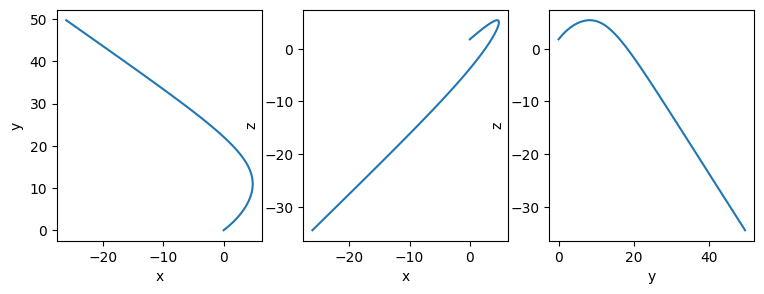

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].plot(X[:, 0], X[:, 1])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(X[:, 0], X[:, 2])
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

axes[2].plot(X[:, 1], X[:, 2])
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')


# Dataset

In [36]:
from typing import Callable

def get_data(
        x0_pdf: Callable = lambda size: np.random.uniform(-10, 10, size=size),
        v0_pdf: Callable = lambda size: np.random.uniform(-10, 10, size=size),
        w_pdf: Callable = lambda size: np.random.uniform(-10, 10, size=size),
        b_pdf: Callable = lambda size: np.random.uniform(0, 1, size=size),
        m_pdf: Callable = lambda size: np.random.uniform(0.5, 1.5, size=size),
        a_pdf: Callable = lambda size: np.random.uniform(0, 0, size=size),
        T: float = 5.0,
        dt: float = 0.1,
        N: int = 1,
        break_on_impact: bool = False,
    ):


    x0 = x0_pdf(size=(N, 3))
    v0 = v0_pdf(size=(N, 3))
    w = w_pdf(size=(N, 3))
    b = b_pdf(size=(N,))
    m = m_pdf(size=(N,))
    a = a_pdf(size=(N, 3))

    # Run the simulation
    X = np.zeros((N, int(T/dt), 3))
    for i in range(N):
        X[i] = physics_ODE_simulation(x0[i], v0[i], g, w[i], b[i], m[i], a[i], T, dt, break_on_impact=break_on_impact)

    # Stack the parameters into a single vector for each simulation
    y = np.column_stack([x0, v0, w, b, m, a])

    return X, y


In [37]:
X, y = get_data(N=100)
X.shape, y.shape

((100, 50, 3), (100, 14))

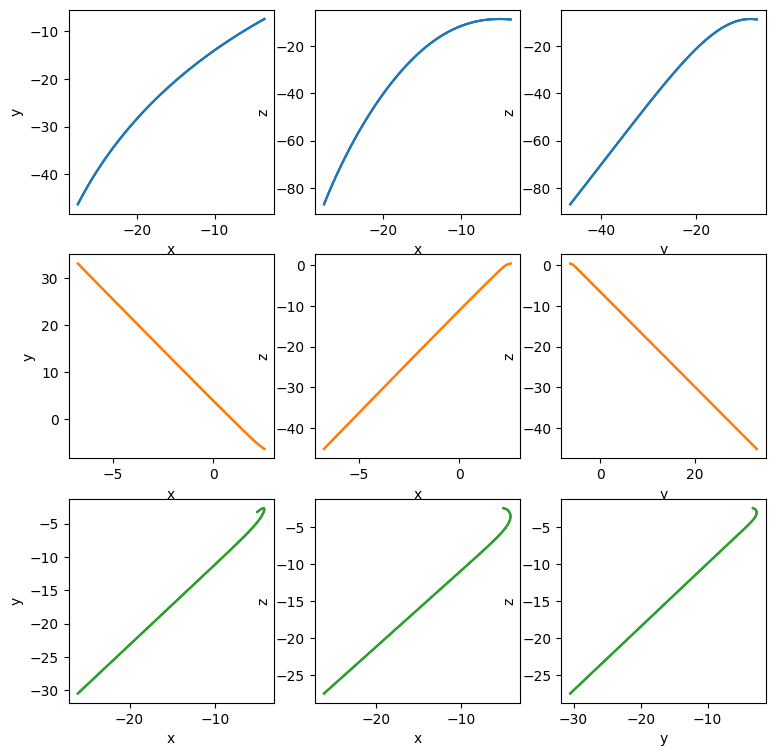

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9))

for i in range(3):
    for j in range(3):
        ax[i, 0].plot(X[i, :, 0], X[i, :, 1], color=f'C{i}')
        ax[i, 0].set_xlabel(f'x')
        ax[i, 0].set_ylabel(f'y')
        
        ax[i, 1].plot(X[i, :, 0], X[i, :, 2], color=f'C{i}')
        ax[i, 1].set_xlabel(f'x')
        ax[i, 1].set_ylabel(f'z')

        ax[i, 2].plot(X[i, :, 1], X[i, :, 2], color=f'C{i}')
        ax[i, 2].set_xlabel(f'y')
        ax[i, 2].set_ylabel(f'z')